<a href="https://colab.research.google.com/github/kariuki-george/stock-prediction/blob/main/stock_prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [293]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, roc_curve,auc
import seaborn as sns

import numpy as np

In [329]:
# filter the companies into their individual csv(s)

csv_dataframe = pd.read_csv("Jan stock prices.csv")



companies = {}

for index in range(len(csv_dataframe)):
  row = csv_dataframe.iloc(0)[index]
  code = row.get("Code")
  if code not in companies:
    companies[code] = []

  companies[code].append(row)

for code in companies:
  company = companies[code]
  company_dataframe = pd.DataFrame(company)
  company_dataframe.to_csv(code + '.csv', mode='w', index=False, header=True)



In [317]:
# Use values from company
# Load the data

raw_data = pd.read_csv("EGAD.csv")

# Preview
print(raw_data.head())


       Date  Code         Name  12m Low  12m High  Day Low  Day High  \
0  3-Jan-22  EGAD  Eaagads Ltd       10      15.0    13.50     13.80   
1  4-Jan-22  EGAD  Eaagads Ltd       10      15.0    12.85     12.85   
2  5-Jan-22  EGAD  Eaagads Ltd       10      15.0    12.85     12.85   
3  6-Jan-22  EGAD  Eaagads Ltd       10      15.0    13.80     13.80   
4  7-Jan-22  EGAD  Eaagads Ltd       10      15.0    13.80     13.80   

   Day Price  Previous Change Change% Volume Adjusted Price  
0      13.50     13.50      -       -  4,000              -  
1      12.85     13.50  -0.65   4.81%    600              -  
2      12.85     12.85      -       -      -              -  
3      13.80     12.85   0.95   7.39%    100              -  
4      13.80     13.80      -       -      -              -  


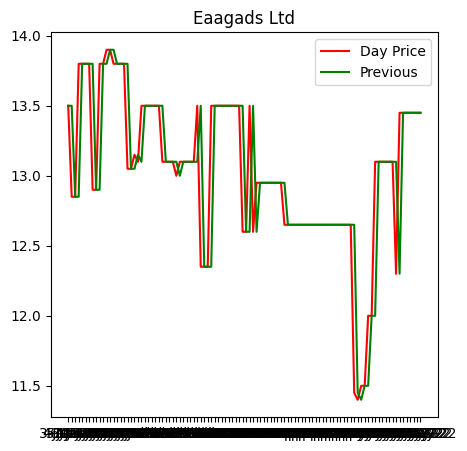

In [318]:
plt.figure(figsize=(5,5))

plt.plot(raw_data['Date'], raw_data['Day Price'], c="r", label="Day Price",)
plt.plot(raw_data['Date'], raw_data['Previous'], c="g", label="Previous",  )
plt.title(raw_data['Name'][0])
plt.legend()

In [319]:
# Preprocess the data
# Prefill the empty cells with 0



data = raw_data.replace('-', pd.NA).fillna(0)

# Drop all string fields that are not necessary

data = data.drop(columns=["Code","Name"])


# Convert the date field into a numerical representation

data["Date"] = pd.to_datetime(data["Date"])
# Convert the datetime to Unix epoch time (seconds since 1970-01-01)
data['Date'] = (data["Date"] - pd.Timestamp("1970-01-01")).dt.total_seconds() // (24 * 60 * 60)


# Remove special characters

columns_to_convert = ['Change%']
# Clean and convert specified columns to numeric type
for col in columns_to_convert:
    # Example: Remove non-numeric characters and convert
    data[col] = pd.to_numeric(data[col].str.replace('[^0-9.]', '', regex=True), errors='coerce')



# Convert all columns to numeric type
numeric_columns = data.select_dtypes(include=['float', 'int',"object"]).columns
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

data = data.replace("NaN", pd.NA).fillna(0)


print(data.head())




      Date  12m Low  12m High  Day Low  Day High  Day Price  Previous  Change  \
0  18995.0       10      15.0    13.50     13.80      13.50     13.50    0.00   
1  18996.0       10      15.0    12.85     12.85      12.85     13.50   -0.65   
2  18997.0       10      15.0    12.85     12.85      12.85     12.85    0.00   
3  18998.0       10      15.0    13.80     13.80      13.80     12.85    0.95   
4  18999.0       10      15.0    13.80     13.80      13.80     13.80    0.00   

   Change%  Volume  Adjusted Price  
0     0.00     0.0               0  
1     4.81   600.0               0  
2     0.00     0.0               0  
3     7.39   100.0               0  
4     0.00     0.0               0  


In [324]:
# Classification
# To classify if to buy or sell
# To Sell on positive change, buy on negative change

classify_data = data.copy()
# # Add the target column
classify_data['Target'] = np.where(classify_data['Change'] <= 0 , 0,1)
print(classify_data.head())






      Date  12m Low  12m High  Day Low  Day High  Day Price  Previous  Change  \
0  18995.0       10      15.0    13.50     13.80      13.50     13.50    0.00   
1  18996.0       10      15.0    12.85     12.85      12.85     13.50   -0.65   
2  18997.0       10      15.0    12.85     12.85      12.85     12.85    0.00   
3  18998.0       10      15.0    13.80     13.80      13.80     12.85    0.95   
4  18999.0       10      15.0    13.80     13.80      13.80     13.80    0.00   

   Change%  Volume  Adjusted Price  Target  
0     0.00     0.0               0       0  
1     4.81   600.0               0       0  
2     0.00     0.0               0       0  
3     7.39   100.0               0       1  
4     0.00     0.0               0       0  


Training: (81, 8) (81,)
Test (21, 8) (21,)
KNN
Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.00      0.00      0.00         0

    accuracy                           0.90        21
   macro avg       0.50      0.45      0.48        21
weighted avg       1.00      0.90      0.95        21

Confusion Matrix:
[[19  2]
 [ 0  0]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


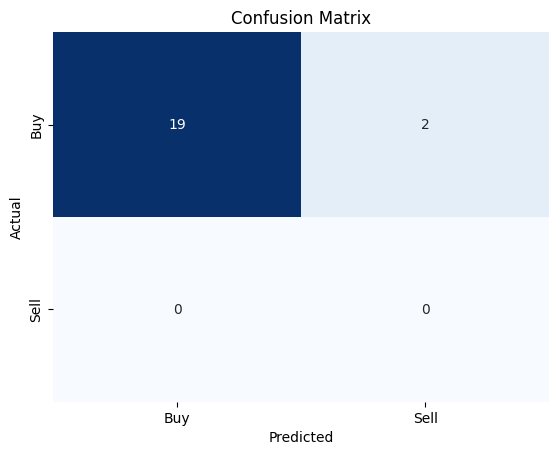



AUC score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


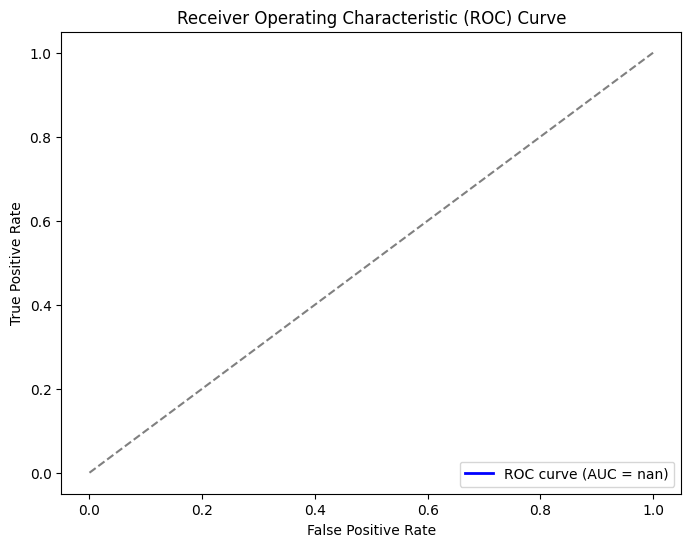

In [325]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load  dataset
knn_data = classify_data

# Define features (X) and target (y)
features = knn_data[['12m Low', '12m High', 'Day Low', 'Day High', 'Day Price',
       'Previous', 'Change',  'Volume']]
target = knn_data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Training:" ,X_train.shape, y_train.shape)
print("Test", X_test.shape, y_test.shape)
# Initialize the KNN model
k_neighbors = 3
model = KNeighborsClassifier(n_neighbors=k_neighbors)

# Fit the model on the training data
model.fit(X_train, y_train)


# Predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_report_str = classification_report(y_test, predictions)

print("KNN")
print(f'Accuracy: {accuracy:.2f}\n')
print('Classification Report:')
print(classification_report_str)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Display the confusion matrix
print('Confusion Matrix:')
print(conf_matrix)
print("\n")

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Buy' ,'Sell'], yticklabels=['Buy','Sell'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print("\n")
# Make predictions on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

print(f"AUC score: {roc_auc:.2f}")
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [326]:
# Regression
# Will predict the day price


regression_data = data
print(regression_data.head())



      Date  12m Low  12m High  Day Low  Day High  Day Price  Previous  Change  \
0  18995.0       10      15.0    13.50     13.80      13.50     13.50    0.00   
1  18996.0       10      15.0    12.85     12.85      12.85     13.50   -0.65   
2  18997.0       10      15.0    12.85     12.85      12.85     12.85    0.00   
3  18998.0       10      15.0    13.80     13.80      13.80     12.85    0.95   
4  18999.0       10      15.0    13.80     13.80      13.80     13.80    0.00   

   Change%  Volume  Adjusted Price  
0     0.00     0.0               0  
1     4.81   600.0               0  
2     0.00     0.0               0  
3     7.39   100.0               0  
4     0.00     0.0               0  


Training: (81, 10) (81,)
Test (21, 10) (21,)
Accuracy: 1.0
Mean Squared Error: 0.00
R-squared Score: 1.00


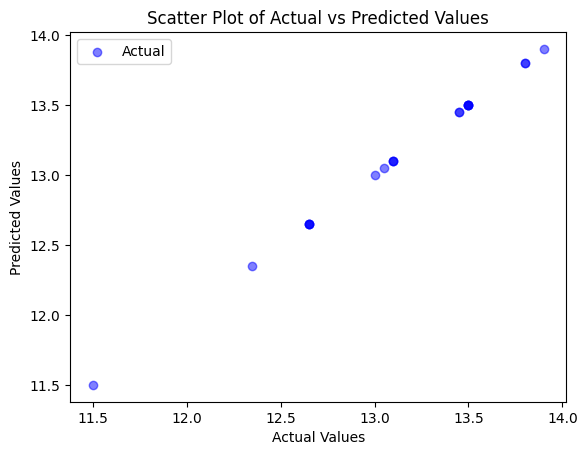

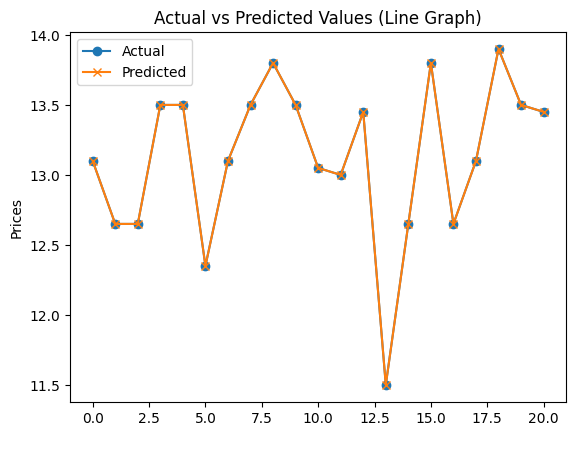

In [327]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
linear_data = regression_data

# Define features (X) and target (y)
features = linear_data[['Date', '12m Low', '12m High', 'Day Low', 'Day High',
       'Previous', 'Change', 'Change%', 'Volume', 'Adjusted Price']]

target = linear_data['Day Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print("Training:" ,X_train.shape, y_train.shape)
print("Test", X_test.shape, y_test.shape)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predictions on the test set
predictions = model.predict(X_test)

# Accuracy
acc = model.score(X_test,y_test)

print(f'Accuracy: {acc}')
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

# Evaluate the model
acc = model.score(X_test,y_test)



mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


plt.scatter(y_test, predictions, alpha=0.5, c=['blue'] )
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.legend(['Actual', 'Predicted'])
plt.show()

print("\n")
# Line graph
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(predictions, label='Predicted', marker='x')
plt.xlabel(' ')
plt.ylabel('Prices')
plt.title('Actual vs Predicted Values (Line Graph)')
plt.legend()
plt.show()



Training: (81, 10) (81,)
Test (21, 10) (21,)
Random Forest
Accuracy: 0.9947754249418501
Mean Squared Error: 0.07
R-squared Score: 0.99


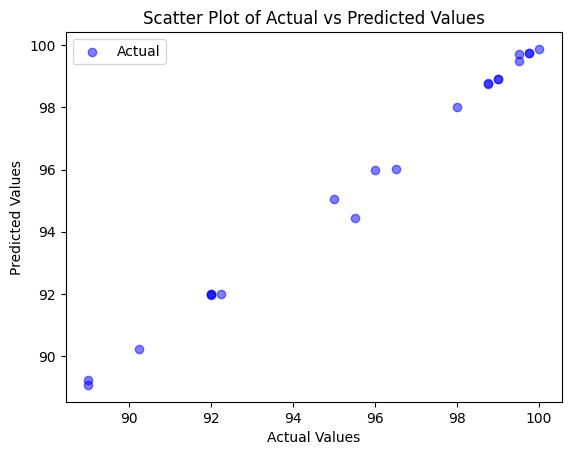

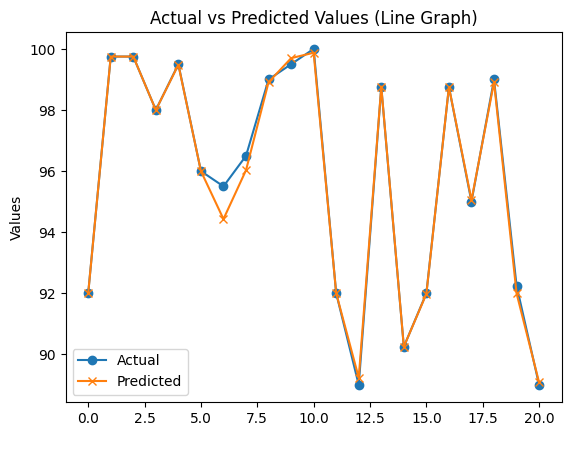

In [315]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
random_data = regression_data
# Define features (X) and target (y)
features = random_data[['Date', '12m Low', '12m High', 'Day Low', 'Day High',
       'Previous', 'Change', 'Change%', 'Volume', 'Adjusted Price']]
target = random_data['Day Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print("Training:" ,X_train.shape, y_train.shape)
print("Test", X_test.shape, y_test.shape)

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
acc = model.score(X_test,y_test)

print("Random Forest")
print(f'Accuracy: {acc}')
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

plt.scatter(y_test, predictions, alpha=0.5, c=['blue'] )
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.legend(['Actual', 'Predicted'])
plt.show()

print("\n")
# Line graph
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(predictions, label='Predicted', marker='x')
plt.xlabel(' ')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values (Line Graph)')
plt.legend()
plt.show()
